# Pretrained CNNs: Classifying Images with Keras

Tech giants like Microsoft and Google use a massive subset of the ImageNet dataset, which includes over a million images, to train cutting-edge CNNs (Convolutional Neural Networks). These CNNs can recognize hundreds of objects, from Arctic foxes to polar bears, and are made available to the public. These are known as pretrained CNNs, and they're way more advanced than anything you might train on your own.

Keras offers classes that wrap more than two dozen popular pretrained CNNs. Let's dive into Keras and use one of these pretrained CNNs to classify a couple of images.

In [1]:
from tensorflow.keras.applications import ResNet50V2

model = ResNet50V2(weights='imagenet')
model.summary()

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 25,613,800 (97.71 MB)

 Trainable params: 25,568,360 (97.54 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [2]:
!unzip Wildlife.zip

Archive:  Wildlife.zip
   creating: Wildlife/
   creating: Wildlife/samples/
   creating: Wildlife/samples/arctic_fox/
  inflating: Wildlife/samples/arctic_fox/arctic_fox_140.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_141.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_142.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_143.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_144.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_145.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_146.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_147.jpeg  
  inflating: Wildlife/samples/arctic_fox/arctic_fox_148.jpeg  
   creating: Wildlife/samples/polar_bear/
  inflating: Wildlife/samples/polar_bear/polar_bear_141.jpeg  
  inflating: Wildlife/samples/polar_bear/polar_bear_142.jpeg  
  inflating: Wildlife/samples/polar_bear/polar_bear_143.jpeg  
  inflating: Wildlife/samples/polar_bear/polar_bear_144.jpeg  
  inflating: Wildlif

Load an arctic fox image.

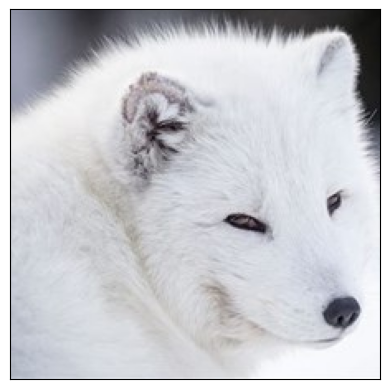

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

x = image.load_img('Wildlife/samples/arctic_fox/arctic_fox_140.jpeg', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the pixels in the image using the `ResNet50V2` version of `preprocess_input` and submit the image to the network for classification. Note that `ResNet50V2` requires pixel values to be divided by 255 after preprocessing.

In [4]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02120079', 'Arctic_fox', np.float32(0.9999944)),
  ('n02114548', 'white_wolf', np.float32(4.7600165e-06)),
  ('n02119789', 'kit_fox', np.float32(2.3306605e-07)),
  ('n02442845', 'mink', np.float32(1.2460325e-07)),
  ('n02111889', 'Samoyed', np.float32(1.19145135e-07))]]

`ResNet50V2` identifies the image as an Arctic fox. How would it respond to a walrus image?

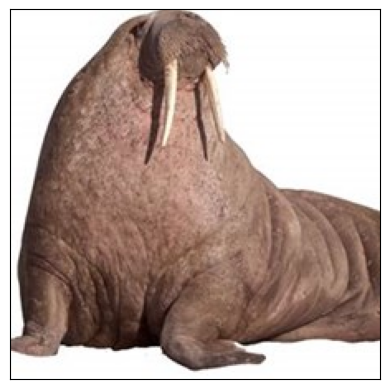

In [5]:
x = image.load_img('Wildlife/samples/walrus/walrus_143.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [6]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


[[('n02454379', 'armadillo', np.float32(0.6375819)),
  ('n01704323', 'triceratops', np.float32(0.16057043)),
  ('n02113978', 'Mexican_hairless', np.float32(0.07795054)),
  ('n02398521', 'hippopotamus', np.float32(0.022284057)),
  ('n01817953', 'African_grey', np.float32(0.01694417))]]

`ResNet50V2` doesn't recognize the walrus in the image. What does this imply about how the network was trained?